In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd
import numpy as np
import os, sys
import h5py

from sklearn.metrics import precision_recall_fscore_support

os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
pwd

'/home/users/cdonoso/astromer/ASTROMER/presentation/notebooks'

In [3]:
def load_embeddings(source):
    file = open(source, 'rb')
    hf = h5py.File(file)
    att = hf['att'][()]
    x = hf['x'][()]
    t = hf['t'][()]
    lc = np.concatenate([t, x], 2)
    y = hf['y'][()]
    l = hf['id'][()]
    m = 1. - hf['m'][()]
    return att, y, l, m, lc

In [4]:
def get_prediction(data, folder, name):
    x, y, l, m, lc = load_embeddings(os.path.join(data, 'test.h5'))
    
    if name == 'lstm':
        x_test = [lc, m]
        print('lstm: ',x_test[0].shape)
    if name == 'lstm_att':
        x_test = [x, m]
        print('lstm_att: ',x_test[0].shape)
    if name == 'mlp_att':
        x_test = np.sum(x*m, 1)/tf.reduce_sum(m)
        print('mlp_att: ',x_test.shape)
        
    model = tf.keras.models.load_model(os.path.join(folder, name, 'model'))
    y_pred = model.predict(x_test)
    y_pred = tf.argmax(y_pred, 1)
    
    return y, y_pred

In [5]:
exp_name = 'alcock'

results = []
for exp in ['{}_20'.format(exp_name), 
            '{}_50'.format(exp_name), 
            '{}_100'.format(exp_name),
            '{}_500'.format(exp_name),
            '{}'.format(exp_name)]:
    
    for model_name in ['lstm', 'lstm_att', 'mlp_att']:
        y, y_pred = get_prediction('../../embeddings/{}'.format(exp), 
                                   '../../experiments/hp/{}'.format(exp), 
                                   model_name)

        prec, reca, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro')
        
        results.append([exp, model_name, f1, prec, reca])

lstm:  (40, 200, 2)


2021-11-10 22:58:11.040409: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-10 22:58:11.040441: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pececillo
2021-11-10 22:58:11.040446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pececillo
2021-11-10 22:58:11.040546: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.82.0
2021-11-10 22:58:11.040565: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.74.0
2021-11-10 22:58:11.040570: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.74.0 does not match DSO version 470.82.0 -- cannot find working devices in this configuration
2021-11-10 22:58:11.041135: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Ne

lstm_att:  (40, 200, 256)


2021-11-10 22:58:22.098491: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:22.407597: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:22.720248: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:22.798415: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:22.811495: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _ou

mlp_att:  (40, 256)
lstm:  (115, 200, 2)


2021-11-10 22:58:33.112702: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:34.451386: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:34.822362: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:34.975630: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:35.129787: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _ou

lstm_att:  (115, 200, 256)


2021-11-10 22:58:43.665514: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:43.996425: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:44.200235: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:44.657741: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:44.937592: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but 

mlp_att:  (115, 256)
lstm:  (248, 200, 2)


2021-11-10 22:58:53.751508: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:53.792761: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:54.924189: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:55.128345: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:58:55.838014: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (248, 200, 256)


2021-11-10 22:59:05.603555: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:05.766187: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:05.867408: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:05.880078: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:06.183922: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_sh

mlp_att:  (248, 256)
lstm:  (1281, 200, 2)


2021-11-10 22:59:17.359038: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:17.439030: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:17.456161: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:17.690795: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:18.280338: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (1281, 200, 256)


2021-11-10 22:59:31.184289: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:31.197708: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:31.212557: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:31.446892: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:31.811645: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

mlp_att:  (1281, 256)
lstm:  (1201, 200, 2)


2021-11-10 22:59:45.641067: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:45.714654: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:47.070182: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:47.082820: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 22:59:47.575097: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_sh

lstm_att:  (1201, 200, 256)


2021-11-10 22:59:59.948700: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 23:00:00.818311: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 23:00:00.831176: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 23:00:00.986275: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-10 23:00:02.498393: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

mlp_att:  (1201, 256)


In [6]:
df_results = pd.DataFrame(results, columns=['exp', 'model', 'f1', 'recall', 'precision'])
df_results.to_csv('../../experiments/hp/results.csv', index=False)

lstm
lstm_att
mlp_att


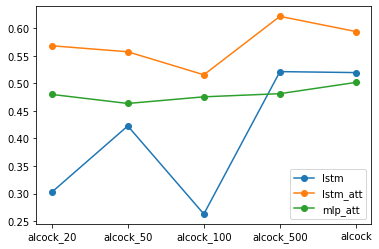

In [7]:
for exp, group in df_results.groupby('model'):
    print(exp)
    xrange = range(len(group['exp']))
    plt.plot(xrange, group['f1'], marker='o',label=exp)
    plt.xticks(xrange, group['exp'])
plt.legend()
plt.show()